# Flight Status Data Exploration Analysis


## Import Statements

In [ ]:
import kagglehub             # Import kaggle to retrieve the dataset
import os                    # Import the operating system to interact with file system
import pandas as pd               # Import pandas for dataframes
import matplotlib.pyplot as plt   # Import visualizations
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

## Problem

Airlines and passengers frequently encounter flight delays and cancellations, leading to missed connections, disrupted schedules, and financial losses. Short layovers amplify these issues, leading to frustrated passengers. Airlines experience operational inefficiencies, overbooking challenges, and revenue loss. To enhance the traveling experience and minimize disruptions, it is crucial to anticipate delays and cancellations early on, allowing passengers and airlines to make informed decisions improving overall efficiency.

## Research Question

To help Airlines and passengers anticipate disruptions to plan accordingly, are we able to predict whether a flight will be on time, delayed, or canceled, and if delayed? If delayed, are we able to estimate the expected delay time?

## Understanding the Dataset

### Dataset Details

**Name:** Flight Status Prediction

---

**Source:** [Kaggle](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data)

---

**License:** CC0 Public Domain

---

**Citation**

Robinson, R. (2022). Flight Delay Dataset (2018-2022) [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022

---

**Description**

The dataset contains all flight information including cancellation and delays by airline dating back to January 2018 and is updated annually.

---

**Background**

Data has been extracted from the Marketing Carrier On-Time Performance data table of the “On-Time” database from the TranStats library.

---

**Size:** Large

**Total number of instances:**

---

**Data Format**

- CSV
- Parquet

---

**Preprocessing**

- Filtered out columns that are mostly null in OG dataset

- Raw data is provided on monthly basis in files

---

### Attributes


**Flight details:**

* Flight ID number

* Airline carrier

* Origin and destination airports

* Scheduled departure and arrival times

* Actual departure and arrival times


**Delay details:**

* Departure delay

* Arrival delay

* Cancellation status

* Cancellation reason


**Additional details:**

* Distance

* Taxi-Out and Taxi-In times

  * Time spent taxiing on the ground during departure and arrival

* Wheels-Off and Wheels-On

  * Times when the aircraft lifted off and touched down


  **Total**: 61

### Retrieve the Dataset

Step 1: Get path to dataset

In [ ]:
# Download the path to access dataset
path = kagglehub.dataset_download("robikscube/flight-delay-dataset-20182022")

# Verify the path
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/flight-delay-dataset-20182022/versions/4


Step 2: Get list of files from path

In [ ]:
# Access the file system of the path
files = os.listdir(path)

# verify files in order to access them
print(files)

['readme.md', 'Combined_Flights_2018.parquet', 'Combined_Flights_2022.csv', 'Combined_Flights_2020.csv', 'Combined_Flights_2021.csv', 'Airlines.csv', 'Combined_Flights_2020.parquet', 'Combined_Flights_2021.parquet', 'raw', 'readme.html', 'Combined_Flights_2018.csv', 'Combined_Flights_2019.csv', 'Combined_Flights_2022.parquet', 'Combined_Flights_2019.parquet']


Step 3: Retrieve the data in parquet format and store into pd.dataframes

- Once stored, review the first five rows

In [ ]:
flights_2018 = pd.read_parquet(path + "/" + "Combined_Flights_2018.parquet")  # Flight data from 2018

In [ ]:
# Review the first five rows
flights_2018.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [ ]:
flights_2019 = pd.read_parquet(path + "/" + "Combined_Flights_2019.parquet")  # Flight data from 2019

In [ ]:
# Review the first five rows
flights_2019.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,1209.0,0.0,-3.0,...,1219.0,1342.0,8.0,1405,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,-12.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,1203.0,0.0,-9.0,...,1214.0,1336.0,6.0,1405,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,1435.0,143.0,143.0,...,1452.0,1615.0,6.0,1405,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,1216.0,4.0,4.0,...,1234.0,1357.0,13.0,1405,5.0,0.0,0.0,1400-1459,3,0


In [ ]:
flights_2020 = pd.read_parquet(path + "/" + "Combined_Flights_2020.parquet")  # Flight data from 2020

In [ ]:
# Review the first five rows
flights_2020.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2030.0,4.0,2056,-22.0,0.0,-2.0,2000-2059,2,0.0
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2022.0,5.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,2000.0,2117.0,5.0,2056,26.0,1.0,1.0,2000-2059,2,0.0
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,1910.0,2023.0,4.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,1910.0,2022.0,4.0,2056,-30.0,0.0,-2.0,2000-2059,2,0.0


In [ ]:
flights_2021 = pd.read_parquet(path + "/" + "Combined_Flights_2021.parquet")  # Flight data from 2021

In [ ]:
# Review the first five rows
flights_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [ ]:
flights_2022 = pd.read_parquet(path + "/" + "Combined_Flights_2022.parquet")  # Flight data from 2022

In [ ]:
# Review the first five rows
flights_2022.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


### Number of Attributes and Instances

Need to check whether all years share the same columns:

In [ ]:
# Compare each dataset to see if all columns are the same for each year
matching_cols = {
    flights_2018.columns.equals(flights_2019.columns) and
    flights_2019.columns.equals(flights_2020.columns) and
    flights_2020.columns.equals(flights_2021.columns) and
    flights_2021.columns.equals(flights_2022.columns)
}

print("All columns are the same:", matching_cols)

All columns are the same: {True}


Create list of relevant years and the datasets for easy iteration:

In [ ]:
# Create list of relevant years
years = [2018, 2019, 2020, 2021, 2022]

# Create a list of datasets
datasets = [flights_2018, flights_2019, flights_2020, flights_2021, flights_2022]

Sum the number of features for flights_2018. Doing so counts the columns each year:

In [ ]:
len(flights_2018.columns)

61

For all years, they share the same number of columns, 61, which is as expected.

Sum the number of instances for each year:

In [ ]:
# Sum the total number of instances for each year
for index, year in enumerate(years):  # For each year,
  # Sum the number of rows
  print("Number of instances for", year, ":", len(datasets[index]))

Number of instances for 2018 : 5689512
Number of instances for 2019 : 8091684
Number of instances for 2020 : 5022397
Number of instances for 2021 : 6311871
Number of instances for 2022 : 4078318


### Identify Target Variable(s)

Step 1:

For the classification problem, we want to determine whether the flight status is on-time, delayed, or canceled.

Review the columns of 2018, which checks columns for all years:

In [ ]:
# Review the columns in 2018 to determine target class
flights_2018.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

We are looking for attributes with binary values to determine if the flight is either on-time, delayed, or canceled:

In [ ]:
# See unique values for  for year 2018
flights_2018.nunique()[flights_2018.nunique() == 2].index

Index(['Cancelled', 'Diverted', 'DepDel15', 'ArrDel15'], dtype='object')

It seems that the class labels could be:

- Cancelled
  - Cancelled Flight Indicator (1=Yes)

- ArrDel15
  - Arrival Delay Indicator, 15 Minutes or More (1=Yes)

  - We would want to know if the arrival of the plane will be late, not the departure


If the ArrDel15 is class 0 and Cancelled is 0, then the flight is on time. We do not need to generate a new feature due to redundancy.

For the regression problem, we need to estimate the expected time duration if the flight is predicted to be delayed.

ArrDelay, Difference in minutes between scheduled and actual arrival time, is the target variable. The reason we use this as the target class over ArrDelayMinutes is because ArrDelay sets early arrivals as negative numbers whereas ArrDelayMinutes set early arrivals as 0. This way, we can even also predict early arrivals.

## Data Cleaning & Preprocessing

### Merge the Datasets

The datasets remain consistent with eachother, so it will be most efficient to merge, then clean.

Add a year column to each dataset to not lose important information:

In [ ]:
# Dictionary containing datasets for each year
datasets = {
    "2018": flights_2018,
    "2019": flights_2019,
    "2020": flights_2020,
    "2021": flights_2021,
    "2022": flights_2022
}

In [ ]:
# Add a "Year" column to each dataset
for year, df in datasets.items():
    df["Year"] = int(year)  # Convert year to integer
    print(f"Added Year Column to {year}")

Added Year Column to 2018
Added Year Column to 2019
Added Year Column to 2020
Added Year Column to 2021
Added Year Column to 2022


Now concat the datasets due to same columns and structure:

In [ ]:
# Merge the datasets
all_flights = pd.concat(datasets.values(), ignore_index=True)

# Review the first five rows
all_flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [ ]:
# Check to ensure Year column was correctly created
all_flights["Year"]

,Year
0,2018
1,2018
2,2018
3,2018
4,2018
...,...
29193777,2022
29193778,2022
29193779,2022
29193780,2022


### Check the Data Types within the Dataset

In [ ]:
# Check the data types to ensure that they are compatible
all_flights.dtypes

,0
FlightDate,datetime64[us]
Airline,object
Origin,object
Dest,object
Cancelled,bool
...,...
ArrDel15,float64
ArrivalDelayGroups,float64
ArrTimeBlk,object
DistanceGroup,int64


In [ ]:
# Get information on the dataset
all_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 61 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[us]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                   

There are incompatible data types in the dataset such as object for ArrTimeBlk, DepTimeBlk, Airline, Origin, etc. The objects need to be converted to compatible data types such as strings, integers, and floats.

The booleans will also need to be converted to integers where 0 is false and 1 is true.

### Check if there are any missing values

In [ ]:
# Check if there are any missing values
missing_vals = all_flights.isnull().sum()
missing_vals[missing_vals > 0]  # show only columns with missing values

,0
DepTime,761652
DepDelayMinutes,763084
DepDelay,763084
ArrTime,786177
ArrDelayMinutes,846183
AirTime,852561
CRSElapsedTime,22
ActualElapsedTime,845637
Tail_Number,267613
DepDel15,763084


There are missing values that need to be cleaned.

### Check for Duplicate Values

In [ ]:
# Check if there is any duplicate values within the dataset
all_flights.duplicated().sum()

0

There are no duplicates so no cleaning necessary.

### Clean the Incompatible Data Types

Let's start with the objects:

In [ ]:
all_flights.loc[:, all_flights.dtypes == object]

,Airline,Origin,Dest,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,OriginCityName,OriginState,OriginStateName,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
0,Endeavor Air Inc.,ABY,ATL,DL,DL_CODESHARE,DL,9E,9E,N8928A,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,1200-1259,1300-1359
1,Endeavor Air Inc.,ABY,ATL,DL,DL_CODESHARE,DL,9E,9E,N800AY,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,1200-1259,1300-1359
2,Endeavor Air Inc.,ABY,ATL,DL,DL_CODESHARE,DL,9E,9E,N8836A,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,1200-1259,1300-1359
3,Endeavor Air Inc.,ABY,ATL,DL,DL_CODESHARE,DL,9E,9E,N800AY,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,1200-1259,1300-1359
4,Endeavor Air Inc.,ABY,ATL,DL,DL_CODESHARE,DL,9E,9E,N8839E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,1400-1459,1500-1559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193777,Republic Airlines,MSY,EWR,UA,UA_CODESHARE,UA,YX,YX,N745YX,"New Orleans, LA",LA,Louisiana,"Newark, NJ",NJ,New Jersey,1900-1959,2300-2359
29193778,Republic Airlines,CLT,EWR,UA,UA_CODESHARE,UA,YX,YX,N654RW,"Charlotte, NC",NC,North Carolina,"Newark, NJ",NJ,New Jersey,1700-1759,1900-1959
29193779,Republic Airlines,ALB,ORD,UA,UA_CODESHARE,UA,YX,YX,N733YX,"Albany, NY",NY,New York,"Chicago, IL",IL,Illinois,1700-1759,1800-1859
29193780,Republic Airlines,EWR,PIT,UA,UA_CODESHARE,UA,YX,YX,N647RW,"Newark, NJ",NJ,New Jersey,"Pittsburgh, PA",PA,Pennsylvania,2100-2159,2200-2259


They are all strings, so we can convert these columns to strings:

In [ ]:
object_columns = all_flights.select_dtypes(include=['object']).columns  # Get list of applicable columns
all_flights[object_columns] = all_flights[object_columns].astype("string")  # and convert stored values to String


In [ ]:
# Check to see if they are correct data type
all_flights.dtypes

,0
FlightDate,datetime64[us]
Airline,string[python]
Origin,string[python]
Dest,string[python]
Cancelled,bool
...,...
ArrDel15,float64
ArrivalDelayGroups,float64
ArrTimeBlk,string[python]
DistanceGroup,int64


The objects have successfully been converted to strings. Now convert Cancelled and Diverted to integers where 0 means False and 1 means True:

In [ ]:
bool_cols = ["Cancelled", "Diverted"]
all_flights[bool_cols] = all_flights[bool_cols].astype(int)

In [ ]:
all_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 61 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[us]
 1   Airline                                  string        
 2   Origin                                   string        
 3   Dest                                     string        
 4   Cancelled                                int64         
 5   Diverted                                 int64         
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                   

### Clean the Missing Values



It is safe to assume that DepTime, DepDelayMinutes, DepDelay, ArrTime, ArrDelayMinutes, Arrtime, ArrDelayMinutes, AirTime, ActualElapsedTime, DepDel15, DepartureDelayGroups,TaxiOut, WheelsOff, WheelsOn, TaxiIn,ArrDelay, ArrDel15, and ArrivalDelayGroups are null due to cancelled flights.

Let's see if that is true:

In [ ]:
# Filter the dataset to only canceled flights
cancelled_flights = all_flights[all_flights["Cancelled"] == True]
len(cancelled_flights)    # Find the length of canceled flights

777267

Based on the numbers of the cancelled flights, it adds up that it may be the reason for the missing values. The remaining missing values can also be due to diverted flights.

Lets fill in the missing values of the cancelled flights and diverted flights with 0:

In [ ]:
columns_to_fill_zero = [
    "DepTime", "DepDelayMinutes", "DepDelay", "ArrTime", "ArrDelayMinutes", "ArrDelay",
    "AirTime", "ActualElapsedTime", "DepDel15", "DepartureDelayGroups", "TaxiOut",
    "WheelsOff", "WheelsOn", "TaxiIn", "ArrDel15", "ArrivalDelayGroups"
]

# Fill all the listed columns with 0 if the flight is cancelled
all_flights.loc[(all_flights["Cancelled"] == 1) | (all_flights["Diverted"] == 1), columns_to_fill_zero] = 0

Recheck to see if there are still empty values:

In [ ]:
all_flights.isnull().sum()[all_flights.isnull().sum() > 0]

,0
DepTime,20
DepDelayMinutes,1105
DepDelay,1105
ArrTime,23
ArrDelayMinutes,569
AirTime,6947
CRSElapsedTime,22
ActualElapsedTime,23
Tail_Number,267613
DepDel15,1105


Lets check to see if there are any missing values that are strings. If so, we may can replace null values with "Unknown" rather than deleted the rows.

In [ ]:
string_cols = all_flights.select_dtypes(include=['string']).columns  # Get list of applicable columns
all_flights[string_cols].isnull().sum()[all_flights[string_cols].isnull().sum() > 0]

,0


In [ ]:
# Save the missing values in Tail_Number to unknown
all_flights["Tail_Number"].fillna("Unknown", inplace=True)

<ipython-input-15-d52317e127c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_flights["Tail_Number"].fillna("Unknown", inplace=True)


Check to make sure there are no missing values:

In [ ]:
all_flights.isnull().sum()[all_flights.isnull().sum() > 0]

,0
DepTime,20
DepDelayMinutes,1105
DepDelay,1105
ArrTime,23
ArrDelayMinutes,569
AirTime,6947
CRSElapsedTime,22
ActualElapsedTime,23
DepDel15,1105
DepartureDelayGroups,1105


Determine the percentage of missing values to determine which rows need to be dropped or if we replace empty value with median:

In [ ]:
missing_percent = (all_flights.isnull().sum() / len(all_flights)) * 100
print(missing_percent.sort_values(ascending=False))

AirTime                            0.023796
TaxiOut                            0.023769
WheelsOff                          0.023769
TaxiIn                             0.023765
WheelsOn                           0.023762
                                     ...   
Tail_Number                        0.000000
Airline                            0.000000
OriginAirportID                    0.000000
OriginAirportSeqID                 0.000000
Flight_Number_Operating_Airline    0.000000
Length: 61, dtype: float64


All of the percentages of missing values is low, so we can replace these values with a general statistic:

In [ ]:
cols_to_fill = all_flights.columns[all_flights.isnull().any()].tolist()

for col in cols_to_fill:
    all_flights[col].fillna(all_flights[col].median(), inplace=True)

<ipython-input-18-4de8dbadf49c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_flights[col].fillna(all_flights[col].median(), inplace=True)


Check to see if any missing values:

In [ ]:
all_flights.isnull().sum().sum()

0

## Identify Class Imbalance

All of potential target classes have binary values. Lets check the value counts of each year to see if there is any imbalances:

In [ ]:
# Check how the values are distributed in the target classes Cancelled
all_flights["Cancelled"].value_counts()

,count
Cancelled,
0,28416515
1,777267


In [ ]:
# Check how the values are distributed in the target classes airDelay15
all_flights["ArrDel15"].value_counts()

,count
ArrDel15,
0.0,24187009
1.0,5006773


In [ ]:
# Check how the values are distributed in the target classes airDelay15
all_flights["ArrDelay"].value_counts()

,count
ArrDelay,
0.0,1372215
-11.0,851106
-12.0,848693
-10.0,847491
-13.0,836088
...,...
1749.0,1
2560.0,1
1868.0,1


There is a significant class imbalance within each target variable where there are more false values than true values.

Also, the Cancelled class contains the boolean data type. To remain consistent, we need to convert it to integers where 0 indicates false and 1 indicates true.

## Identify Correlations & Feature Relationships

Check if there is any correlation between DepDelay, delay time of departure, and ArrDelay, time of arrival for each year using a heatmap.

Other attributes that may be related to delays is DepDelayMinutes, ArrDelayMinutes, TaxiOut, and ActualElapsedTime.

DepDelayMinutes and ArrDelayMinutes are the same as
DepDelay and ArrDelay but do not take in account of early arrivals. TaxiOut provides information on how long it takes for a plane to leave the gate. ActualElapsedTime provides information on the actual duration of the plane flight indicating if a flight took longer than expected.

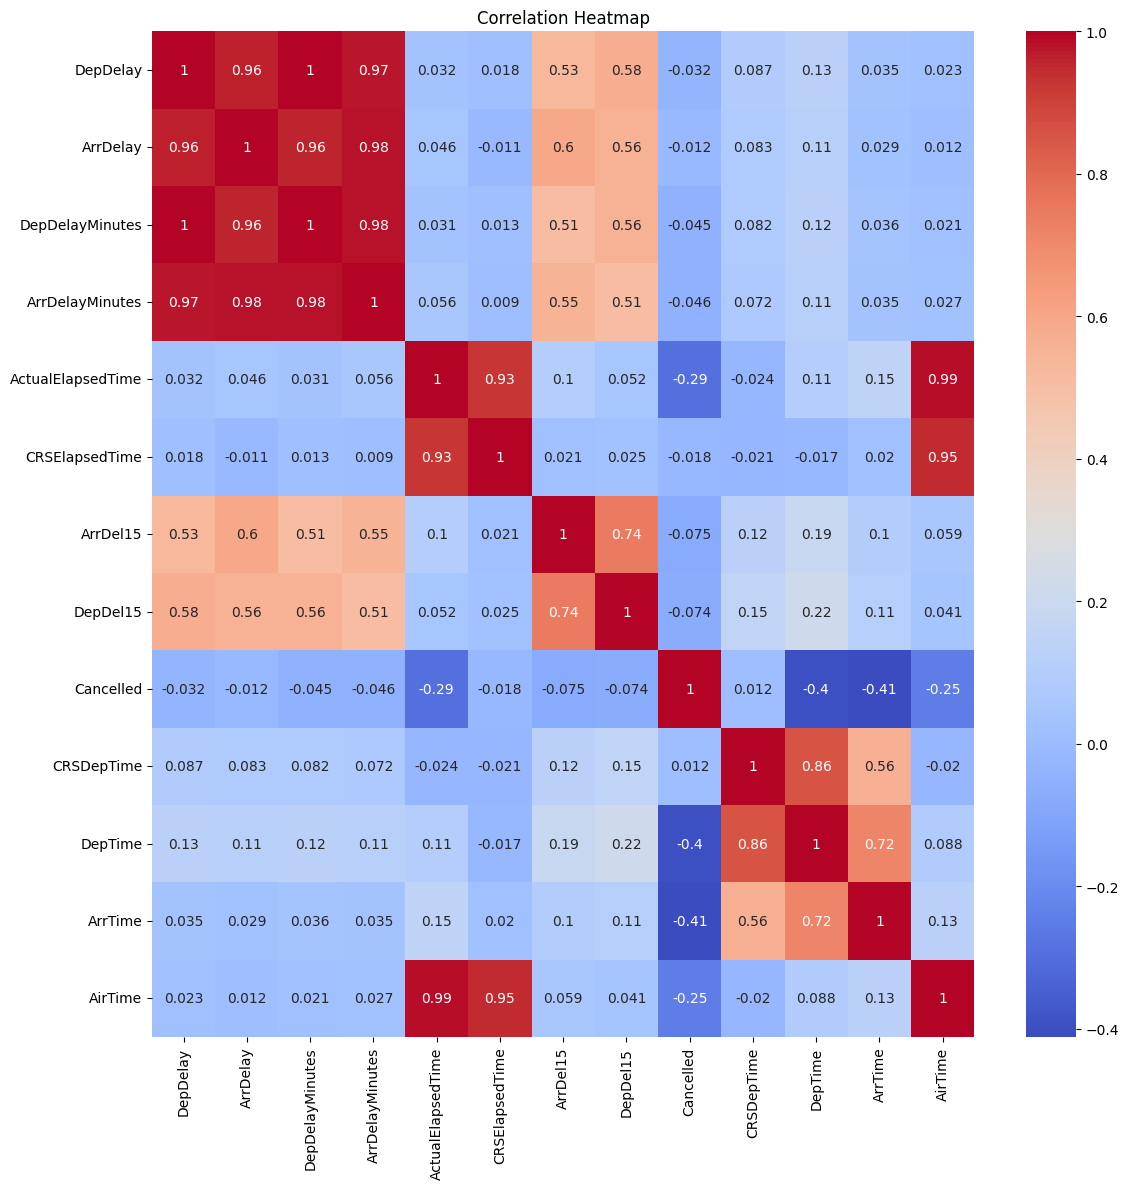

In [ ]:
# Select relevant numerical columns for correlation analysis
selected_columns = ["DepDelay", "ArrDelay", "DepDelayMinutes", "ArrDelayMinutes",
                    "ActualElapsedTime", "CRSElapsedTime", "ArrDel15", "DepDel15",
                    'Cancelled', "CRSDepTime", "DepTime", "ArrTime", "AirTime"]

# Set up subplots
fig, axes = plt.subplots(figsize=(12, 12))  # Adjust height dynamically

# Ensure only selected columns are used (to avoid issues with missing columns)
available_columns = [col for col in selected_columns if col in all_flights.columns]

# Compute correlation matrix
corr_matrix = all_flights[available_columns].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes)

# Set title
axes.set_title("Correlation Heatmap")

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

- DepTime and ArrTime correlate negatively with Cancelled, which might mean flights at certain hours are more prone to cancellation.

-  flights generally depart close to their scheduled times based on correlation of CRSDepTime and DepTime

- AirTime is almost perfectly correlated with ActualElapsedTime
  - ActualElapsedTime has a stronger impact on cancellation of flights

- DepDelay and ArrDelay are strongly correlated meaning delay in departure affects delay in arrival

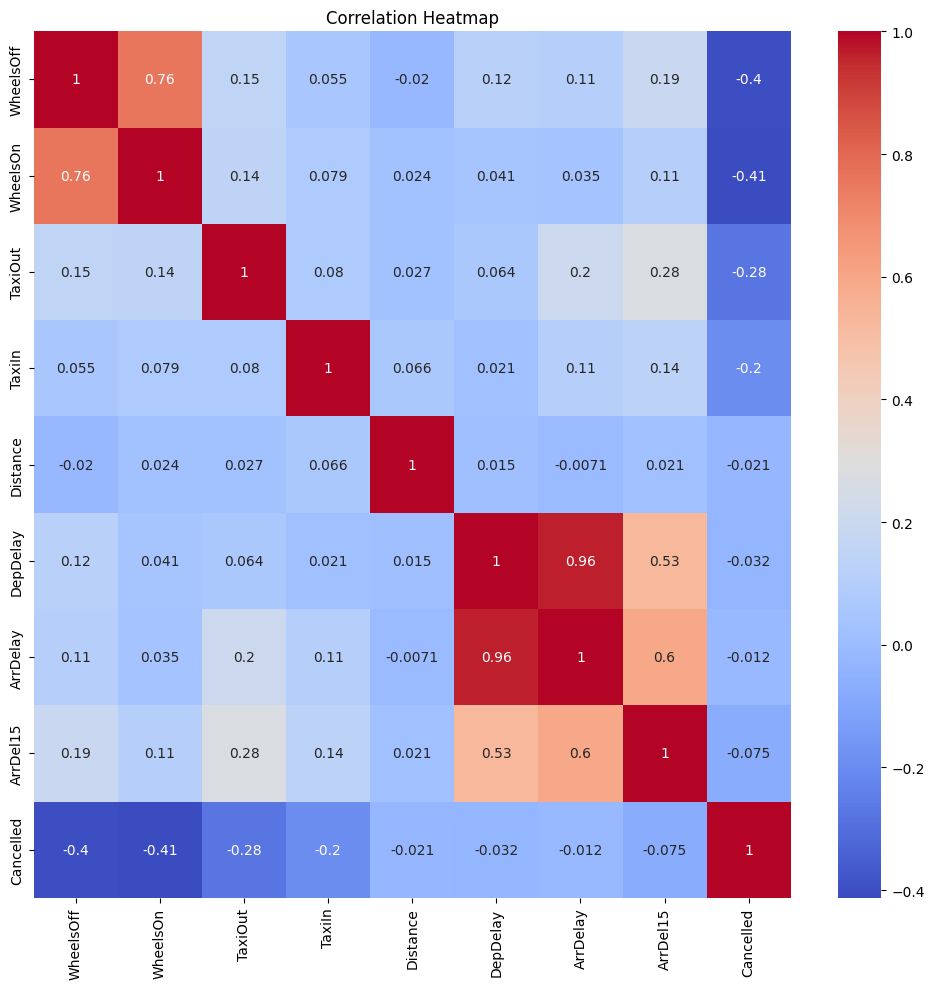

In [ ]:
# Select relevant numerical columns for correlation analysis
selected_columns = ["WheelsOff", "WheelsOn", "TaxiOut", "TaxiIn", "Distance",
                    "DepDelay", "ArrDelay", "ArrDel15", "Cancelled"]

# Set up subplots
fig, axes = plt.subplots(figsize=(10, 10))  # Adjust height dynamically

# Ensure only selected columns are used (to avoid issues with missing columns)
available_columns = [col for col in selected_columns if col in all_flights.columns]

# Compute correlation matrix
corr_matrix = all_flights[available_columns].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes)

# Set title
axes.set_title("Correlation Heatmap")

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

- Airtime and Distance are strongly correlated

- WheelsOff and WheelsOn are strongly correlated as expected
  -  Earlier WheelsOff and WheelsOn has lower chance of Cancelled

- Higher AirTime and Distance has a lower chance of Cancelled
  - Thus, short flights have higher rate of Cancelled

- TaxiOut and ArrDelay15 may indicate that longer Tax out times might contribute to delays

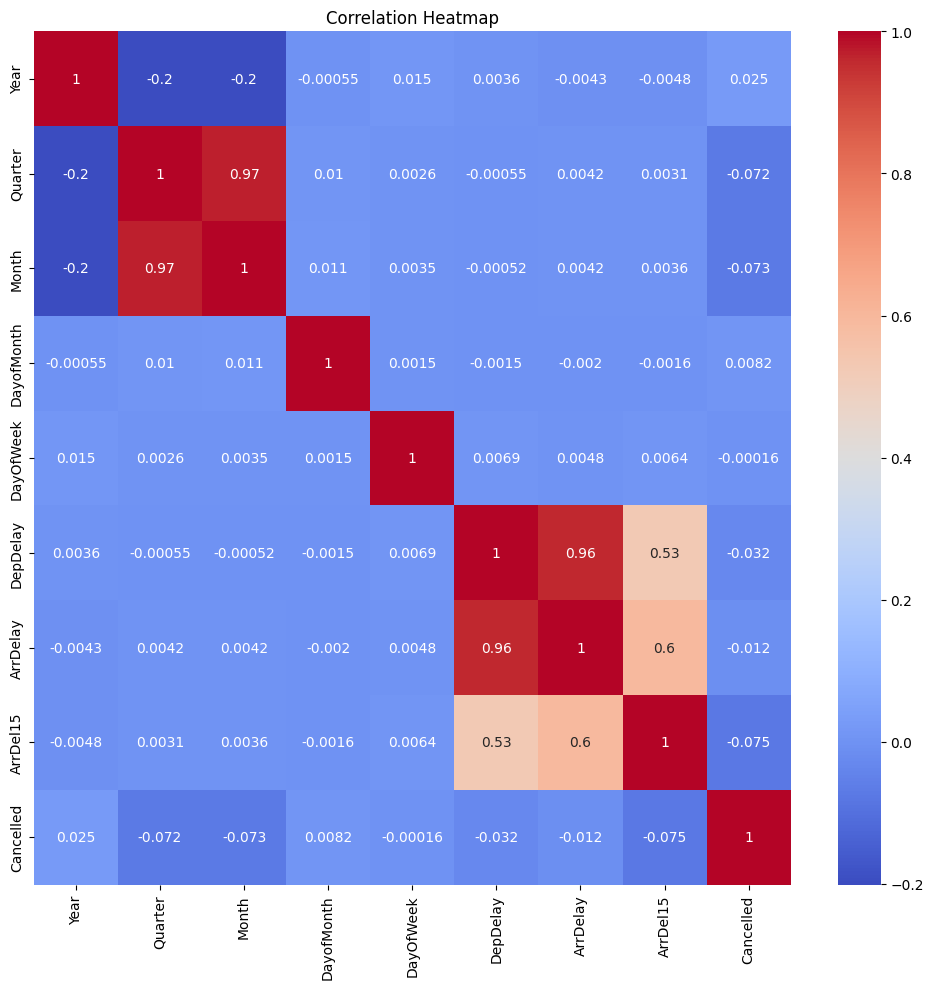

In [ ]:
# Select relevant numerical columns for correlation analysis
selected_columns = ["Year", "Quarter", "Month", "DayofMonth", "DayOfWeek",
                    "DepDelay", "ArrDelay", "ArrDel15", "Cancelled"]

# Set up subplots
fig, axes = plt.subplots(figsize=(10, 10))  # Adjust height dynamically

# Ensure only selected columns are used (to avoid issues with missing columns)
available_columns = [col for col in selected_columns if col in all_flights.columns]

# Compute correlation matrix
corr_matrix = all_flights[available_columns].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes)

# Set title
axes.set_title("Correlation Heatmap")

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

- Month and quarter are identical so remove quarter due to less information than month

- Data dealing with time does not have much information for delays, may recommend only keeping DayOfWeek due to comparing the week with the weekend may be useful over DayOfMonth

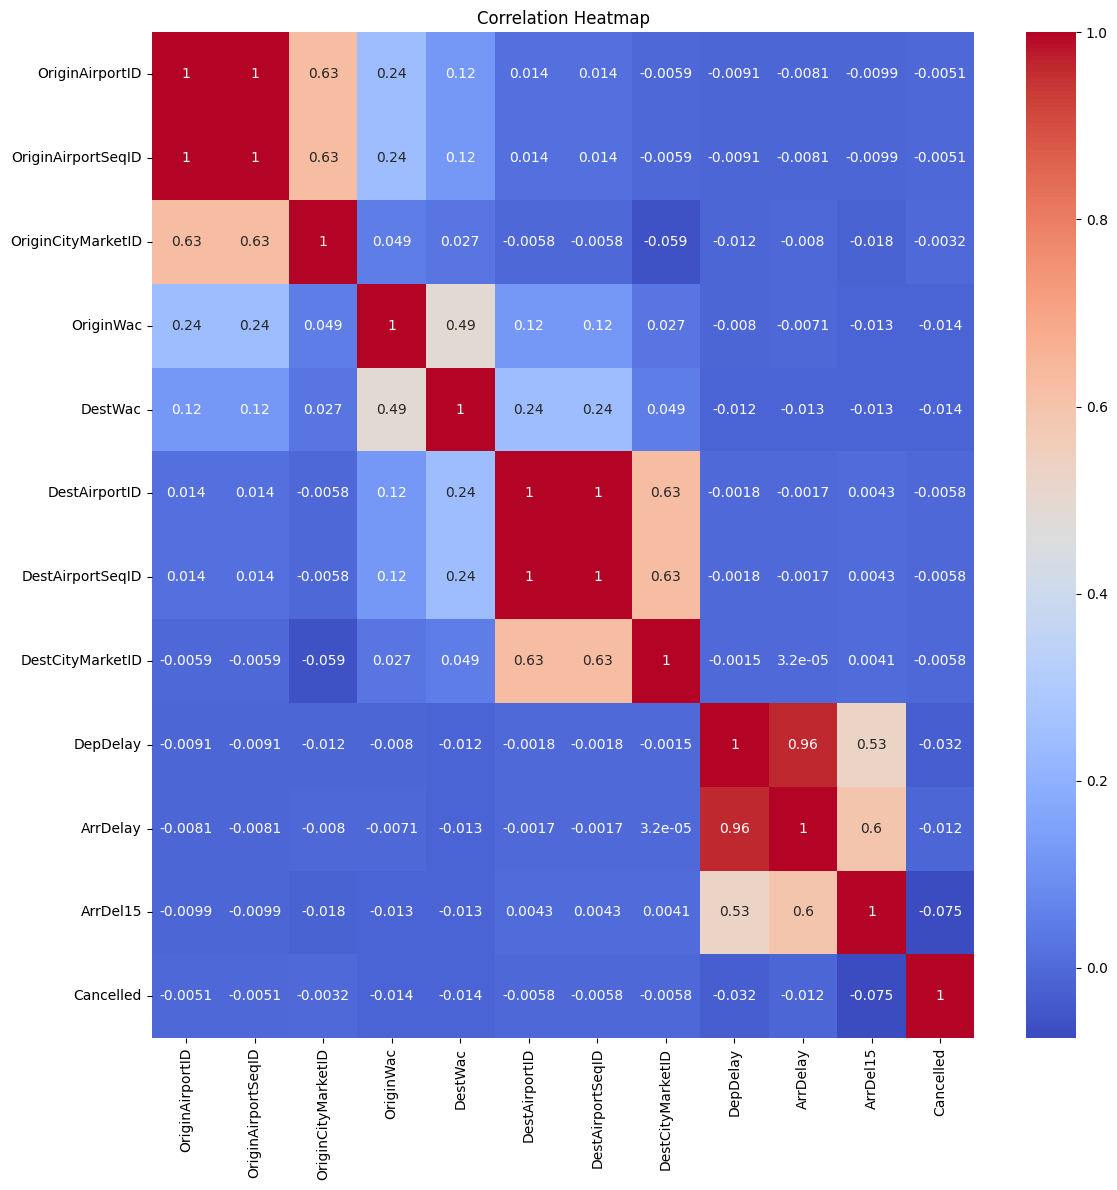

In [ ]:
# Select relevant numerical columns for correlation analysis
selected_columns = ["OriginAirportID", "OriginAirportSeqID", "OriginCityMarketID",
                   "OriginWac", "DestWac", "DestAirportID", "DestAirportSeqID",
                    "DestCityMarketID", "DepDelay", "ArrDelay", "ArrDel15",
                    "Cancelled"]

# Set up subplots
fig, axes = plt.subplots(figsize=(12, 12))  # Adjust height dynamically

# Ensure only selected columns are used (to avoid issues with missing columns)
available_columns = [col for col in selected_columns if col in all_flights.columns]

# Compute correlation matrix
corr_matrix = all_flights[available_columns].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes)

# Set title
axes.set_title("Correlation Heatmap")

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

- OriginAirportID and OriginAirportSeqID are 100% correlated, drop one

- DestAirportID and DestAirportSeqID are 100% correlated, drop one

- The airports have little information on delays and cancellations

- flights departing from certain WAC regions are somewhat likely to land in similar WAC regions.

- WAC has little effects on delays and cancellations

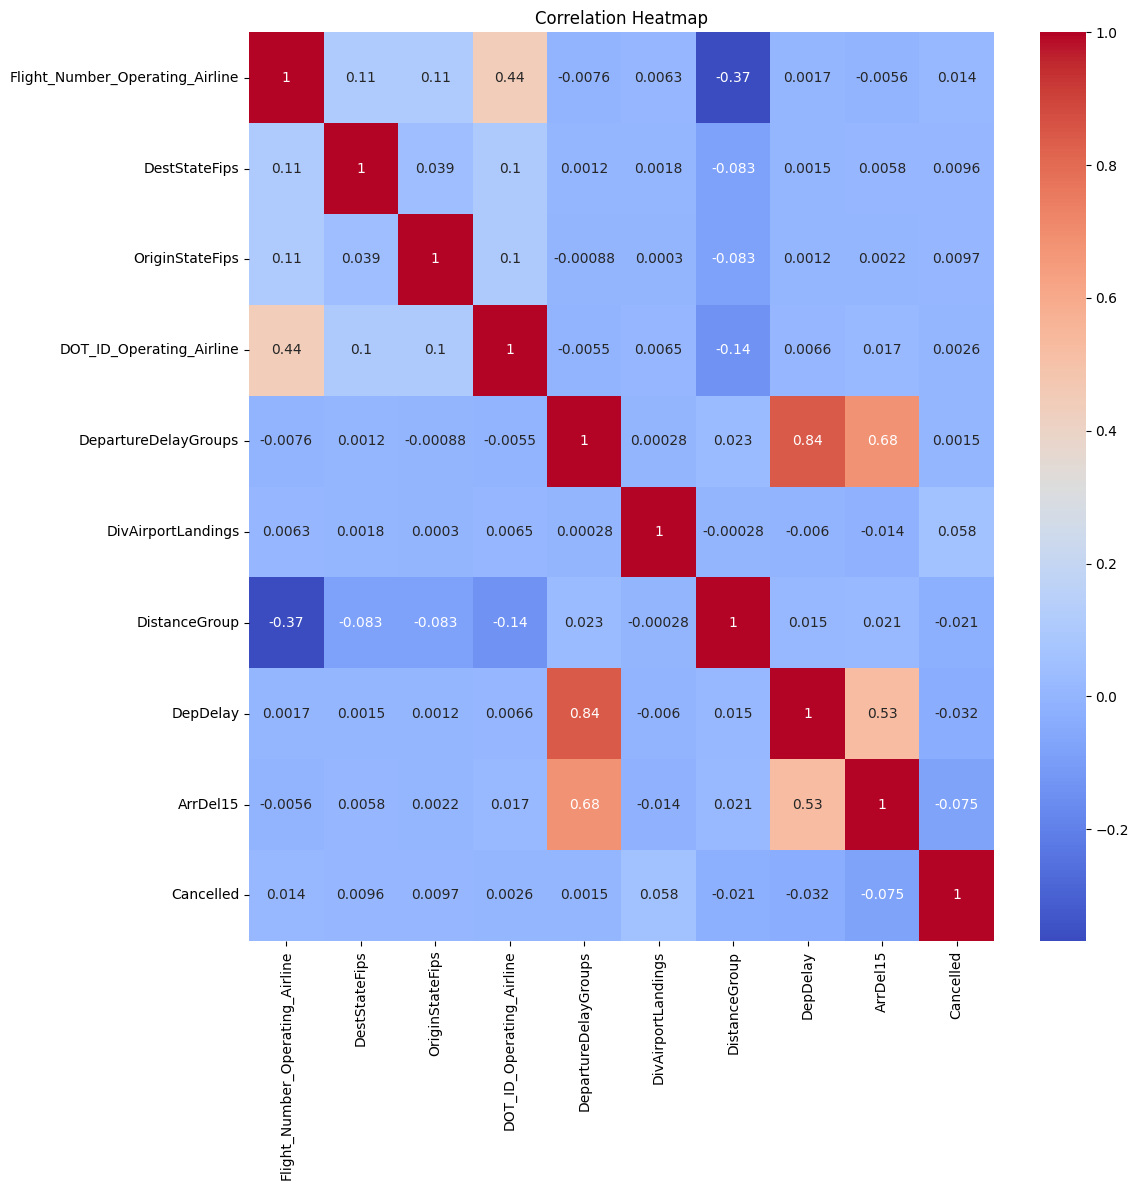

In [ ]:
# Select relevant numerical columns for correlation analysis
selected_columns = ["Flight_Number_Operating_Airline", "DestStateFips",
                    "OriginStateFips", " DOT_ID_Marketing_Airline",
                    "DOT_ID_Operating_Airline", "DepartureDelayGroups",
                    "ArrivalDelayGroup", "DivAirportLandings", "DistanceGroup",
                    "DepDelay", "ArrDel15", "Cancelled"]

# Set up subplots
fig, axes = plt.subplots(figsize=(12, 12))  # Adjust height dynamically

# Ensure only selected columns are used (to avoid issues with missing columns)
available_columns = [col for col in selected_columns if col in all_flights.columns]

# Compute correlation matrix
corr_matrix = all_flights[available_columns].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes)

# Set title
axes.set_title("Correlation Heatmap")

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

- DepDelay is already a continuous variable and provides more information than the categorical DepartureDelayGroups, so using DepDelay alone is preferable
  - strong correlation shows redundant info

- Departure delay groups are moderately correlated with whether a flight is significantly delayed
  - May be useful for classification problem? or redundant?

- DistanceGroup and Flight_Number_Operating_Airline may indicate there are lower numbers of short flights, but may not be a predictor

- Cancellations may need better predictors such as weather

### Data Visualizations

Check the first five rows:

In [ ]:
all_flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,0,0,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,0,0,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,0,0,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,0,0,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,0,0,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


Create a graph showing the problem of delays and missed connections:

In [ ]:
all_flights.sort_values(by=['FlightDate', 'Airline', 'Origin', 'DepTime'], inplace=True)

In [ ]:
# Compute layover time (shifted arrival time from previous flight)
all_flights['LayoverTime'] = all_flights['DepTime'] - all_flights['ArrTime'].shift(1)

# Make sure it's only for the same airline & airport
all_flights.loc[all_flights['Origin'] != all_flights['Dest'].shift(1), 'LayoverTime'] = -1  # No valid next flight
all_flights.loc[all_flights['LayoverTime'] < 0, 'LayoverTime'] = -1  # Invalid layovers (negative time)

In [ ]:
all_flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,NextDepTime,NextFlightDate,LayoverTime
156084,2018-01-01,Air Wisconsin Airlines Corp,ATW,ORD,False,False,535,528.0,0.0,-7.0,...,650,-21.0,0.0,-2.0,0600-0659,1,0.0,912.0,2018-01-01,-1.0
156221,2018-01-01,Air Wisconsin Airlines Corp,ATW,ORD,False,False,820,912.0,52.0,52.0,...,935,51.0,1.0,3.0,0900-0959,1,0.0,1034.0,2018-01-01,-1.0
156219,2018-01-01,Air Wisconsin Airlines Corp,ATW,ORD,False,False,1035,1034.0,0.0,-1.0,...,1142,-6.0,0.0,-1.0,1100-1159,1,0.0,1934.0,2018-01-01,-1.0
156135,2018-01-01,Air Wisconsin Airlines Corp,AVP,ORD,False,False,1715,1934.0,139.0,139.0,...,1840,167.0,1.0,11.0,1800-1859,3,0.0,1437.0,2018-01-01,-1.0
156180,2018-01-01,Air Wisconsin Airlines Corp,AZO,ORD,False,False,1300,1437.0,97.0,97.0,...,1305,110.0,1.0,7.0,1300-1359,1,0.0,1911.0,2018-01-01,-1.0


In [ ]:
all_flights["LayoverTime"].value_counts()

,count
LayoverTime,
-1.0,29191983
0.0,367
87.0,19
85.0,16
82.0,16
...,...
482.0,1
166.0,1
141.0,1


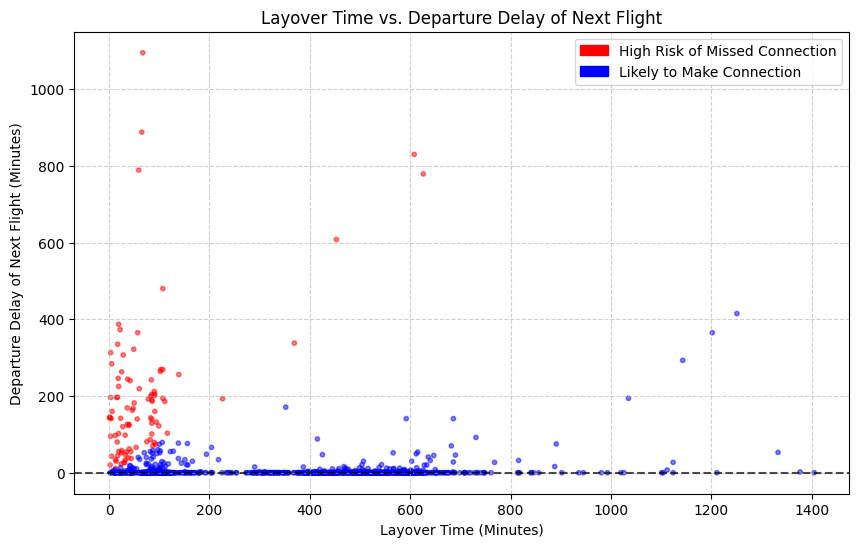

In [ ]:
# Ensure required columns exist
if "LayoverTime" in all_flights.columns and "DepDelayMinutes" in all_flights.columns:
    # Filter out invalid layover values (-1.0)
    df_valid = all_flights[all_flights["LayoverTime"] > 0]

    # Define colors: red if delay is greater than layover time (missed connection), blue otherwise
    colors = np.where(df_valid["DepDelayMinutes"] >= df_valid["LayoverTime"] * 0.75, 'red', 'blue')

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_valid["LayoverTime"], df_valid["DepDelayMinutes"], c=colors, alpha=0.5, s=10)
    plt.xlabel("Layover Time (Minutes)")
    plt.ylabel("Departure Delay of Next Flight (Minutes)")
    plt.title("Layover Time vs. Departure Delay of Next Flight")
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)  # Reference line for no delay
    plt.grid(True, linestyle="--", alpha=0.6)

    # Add legend
    missed_patch = mpatches.Patch(color='red', label="High Risk of Missed Connection")
    safe_patch = mpatches.Patch(color='blue', label="Likely to Make Connection")
    plt.legend(handles=[missed_patch, safe_patch])

    # Show plot
    plt.show()
else:
    print("Required columns 'LayoverTime' and 'DepDelayMinutes' not found in dataset.")

## Identify Outliers

We need to determine if the dataset contains any outliers.

## Explore Feature Distributions

In [ ]:
# Select only numerical columns (int64 and float64)
all_flights.describe()